In [7]:
!pip install qiskit
!pip install qiskit-aer
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 66.1 MB/s eta 0:00:00


Result (counts): {'000101': 1024}


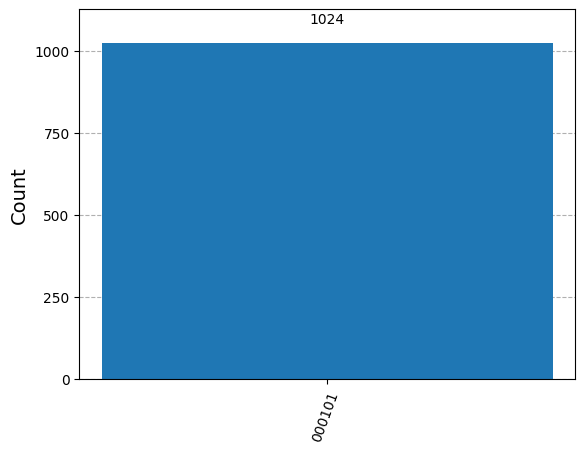

In [22]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import IntegerComparator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

a = 5
b = 4

num_bits = max(a.bit_length(), b.bit_length())

comparator = IntegerComparator(num_bits, value=b)

qc = QuantumCircuit(comparator.num_qubits)
qc.append(comparator, range(comparator.num_qubits))

binary_a = format(a, f'0{num_bits}b')
for i, bit in enumerate(reversed(binary_a)):
    if bit == '1':
        qc.x(i)

qc.measure_all()

unrolled_circuit = transpile(qc, basis_gates=['u', 'cx'], optimization_level=3)


simulator = AerSimulator()
result = simulator.run(unrolled_circuit).result()
counts = result.get_counts()
print("Result (counts):", counts)
plot_histogram(counts)
